Resolver el problema de Fashion-MNIST utilizando funciones de biblioteca. Comparar los modelos LogisticRegression() vs. SGDClassifier(); una vez comparados se puede utilizar solo un modelo para la resolución del problema.


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mnist_reader
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [41]:
x_train_all, y_train_all = mnist_reader.load_mnist('dataset/data/fashion', kind='train')
x_test_all, y_test_all = mnist_reader.load_mnist('dataset/data/fashion', kind='t10k')

In [42]:
x_train_all, y_train_all

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([9, 0, 0, ..., 3, 0, 5], dtype=uint8))

In [43]:
x_test_all, y_test_all

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

Los labels estan identificados por:

| Label | Descripcion |
|:-----:|:-----------:|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

In [44]:
test_digit = x_train_all[0]
test_ditit_img = test_digit.reshape(28,28)

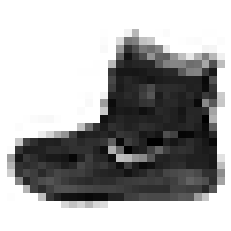

In [45]:
plt.imshow(test_ditit_img, cmap="binary")
plt.axis("off")
plt.show()

In [46]:
_, counts = np.unique(y_train_all, return_counts=True)
counts 

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64)

In [47]:
_, counts = np.unique(y_test_all, return_counts=True)
counts 

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64)

In [48]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train_all = min_max_scaler.fit_transform(x_train_all)
x_test_all = min_max_scaler.fit_transform(x_test_all)

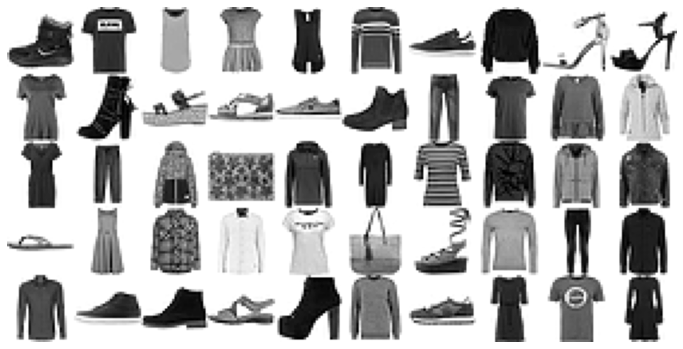

In [49]:
def plot_images_matrix(images, image_size, images_per_row):
    images = [image.reshape(image_size,image_size) for image in images]
    
    n_rows = (len(images)-1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(images)
    images.append(np.zeros((image_size, image_size * n_empty)))
    
    row_images = []
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")

plt.figure(figsize=(12,12))
plot_images_matrix(x_train_all[0:50], 28, 10)
plt.show()

In [50]:
lgr = LogisticRegression(solver='saga', random_state= 42)

In [51]:
lgr.fit(x_train_all, y_train_all)

C:\Users\emire\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(random_state=42, solver='saga')

In [52]:
cloth_pred = lgr.predict(x_test_all)
cloth_pred

array([9, 2, 1, ..., 6, 1, 5], dtype=uint8)

In [53]:
cm = confusion_matrix(y_test_all, cloth_pred)
cm

array([[805,   2,  11,  53,   5,   3, 111,   0,  10,   0],
       [  5, 956,   4,  26,   4,   0,   3,   0,   2,   0],
       [ 23,   4, 740,  10, 125,   1,  84,   1,  12,   0],
       [ 26,  14,  17, 865,  29,   0,  39,   0,  10,   0],
       [  0,   2, 114,  36, 762,   0,  79,   0,   7,   0],
       [  1,   0,   0,   1,   0, 923,   0,  49,   4,  22],
       [141,   2, 125,  38, 103,   0, 568,   0,  23,   0],
       [  0,   0,   0,   0,   0,  30,   0, 941,   0,  29],
       [  7,   1,   9,  13,   3,   5,  21,   5, 936,   0],
       [  0,   1,   0,   0,   0,  14,   1,  40,   0, 944]], dtype=int64)

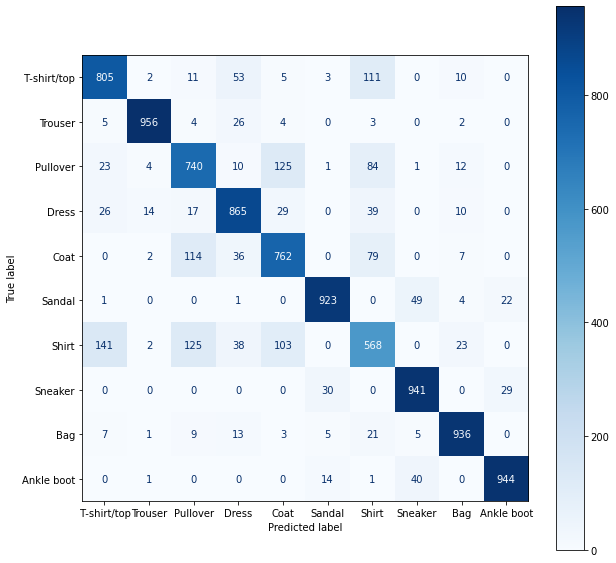

In [54]:
class_names = [" T-shirt/top", "Trouser", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag", "Ankle boot"]

fig, ax = plt.subplots(figsize=(10,10))  
plot_confusion_matrix(lgr, x_test_all, y_test_all,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                 ax= ax)


In [55]:
print(classification_report(y_test_all, cloth_pred, target_names= class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.81      0.80      1000
     Trouser       0.97      0.96      0.96      1000
    Pullover       0.73      0.74      0.73      1000
       Dress       0.83      0.86      0.85      1000
        Coat       0.74      0.76      0.75      1000
      Sandal       0.95      0.92      0.93      1000
       Shirt       0.63      0.57      0.60      1000
     Sneaker       0.91      0.94      0.92      1000
         Bag       0.93      0.94      0.93      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [56]:
x_train_sgd, y_train_sgd = mnist_reader.load_mnist('dataset/data/fashion', kind='train')
x_test_sgd, y_test_sgd = mnist_reader.load_mnist('dataset/data/fashion', kind='t10k')

In [57]:
x_train_sgd[:10], x_test_unique[:10]

(array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ..., 70,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [58]:
y_train_sgd[:10], y_test_sgd[:10]

(array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

In [59]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train_sgd = min_max_scaler.fit_transform(x_train_sgd)
x_test_unique = min_max_scaler.fit_transform(x_test_unique)

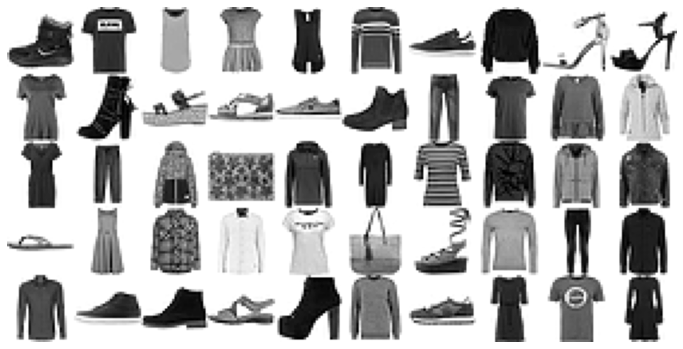

In [60]:
def plot_images_matrix(images, image_size, images_per_row):
    images = [image.reshape(image_size,image_size) for image in images]
    
    n_rows = (len(images)-1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(images)
    images.append(np.zeros((image_size, image_size * n_empty)))
    
    row_images = []
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")

plt.figure(figsize=(12,12))
plot_images_matrix(x_train_all[0:50], 28, 10)
plt.show()

In [61]:
sgd = SGDClassifier(loss='log', max_iter=5000)

In [62]:
sgd.fit(x_train_sgd, y_train_sgd)

SGDClassifier(loss='log', max_iter=5000)

In [63]:
cloth_pred_sgd = sgd.predict(x_test_sgd)
cloth_pred_sgd

array([9, 2, 1, ..., 8, 1, 9], dtype=uint8)

In [64]:
cm_sgd = confusion_matrix(y_test_sgd, cloth_pred_sgd)
cm_sgd

array([[622,  32,  52,  10, 129,   0,  32,   0,  51,  72],
       [  0, 939,   0,   5,  10,   0,   0,   0,   1,  45],
       [  7,  11, 596,   4, 325,   0,   8,   1,  21,  27],
       [  6,  44,  24, 354, 172,   0,  12,   0,  11, 377],
       [  0,   5,  30,   0, 936,   0,   2,   0,  11,  16],
       [  0,   1,   0,   0,   4, 137,   0,  38,  36, 784],
       [ 73,  21, 113,   5, 546,   0, 115,   0,  66,  61],
       [  0,   0,   0,   0,   0,   0,   0, 318,   1, 681],
       [  0,   1,   3,   1,   9,   0,   1,   1, 921,  63],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1, 999]], dtype=int64)

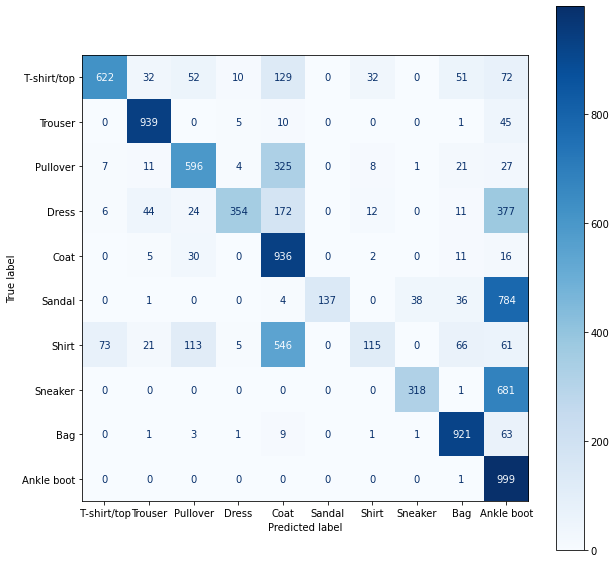

In [65]:
class_names = [" T-shirt/top", "Trouser", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag", "Ankle boot"]

fig, ax = plt.subplots(figsize=(10,10))  
plot_confusion_matrix(sgd, x_test_sgd, y_test_sgd,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                 ax= ax)


In [66]:
print(classification_report(y_test_sgd, cloth_pred_sgd, target_names= class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.62      0.73      1000
     Trouser       0.89      0.94      0.91      1000
    Pullover       0.73      0.60      0.66      1000
       Dress       0.93      0.35      0.51      1000
        Coat       0.44      0.94      0.60      1000
      Sandal       1.00      0.14      0.24      1000
       Shirt       0.68      0.12      0.20      1000
     Sneaker       0.89      0.32      0.47      1000
         Bag       0.82      0.92      0.87      1000
  Ankle boot       0.32      1.00      0.48      1000

    accuracy                           0.59     10000
   macro avg       0.76      0.59      0.57     10000
weighted avg       0.76      0.59      0.57     10000

